In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab \Notebooks/microscopy_self_supervised_learning/

/content/drive/MyDrive/Colab Notebooks/microscopy_self_supervised_learning


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [4]:
# metadata with moa
full_meta = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/microscopy_self_supervised_learning/data/metadata/full_meta.csv")
full_meta.head(3)

,Unnamed: 0,TableNumber,ImageNumber,Image_FileName_DAPI,Image_PathName_DAPI,Image_FileName_Tubulin,Image_PathName_Tubulin,Image_FileName_Actin,Image_PathName_Actin,Image_Metadata_Plate_DAPI,Image_Metadata_Well_DAPI,Replicate,Image_Metadata_Compound,Image_Metadata_Concentration,compound,concentration,moa
0,0,1,11,Week1_150607_B04_s3_w135D66B4C-0548-4AB8-A57B-...,Week1/Week1_22123,Week1_150607_B04_s3_w2D81AEFB9-9DD4-4B59-9177-...,Week1/Week1_22123,Week1_150607_B04_s3_w408BE006A-BF34-457E-81A9-...,Week1/Week1_22123,Week1_22123,B04,1,cytochalasin B,10.0,cytochalasin B,10.0,Actin disruptors
1,1,1,12,Week1_150607_B04_s4_w1EB720AD1-83BA-48A7-8C47-...,Week1/Week1_22123,Week1_150607_B04_s4_w261B79A05-7534-46F3-8C80-...,Week1/Week1_22123,Week1_150607_B04_s4_w49FF7E7B1-F049-4994-BCA2-...,Week1/Week1_22123,Week1_22123,B04,1,cytochalasin B,10.0,cytochalasin B,10.0,Actin disruptors
2,2,1,9,Week1_150607_B04_s1_w11323931B-BDA7-4F42-870E-...,Week1/Week1_22123,Week1_150607_B04_s1_w2F8F7EA7A-EC57-49CA-A556-...,Week1/Week1_22123,Week1_150607_B04_s1_w494DCA5C4-3531-497D-A8B0-...,Week1/Week1_22123,Week1_22123,B04,1,cytochalasin B,10.0,cytochalasin B,10.0,Actin disruptors


In [5]:
#column clean-up
full_meta = full_meta.drop(columns=["compound", "concentration"])

full_meta = full_meta.rename(columns={
    "Image_Metadata_Compound": "compound",
    "Image_Metadata_Concentration": "concentration",
    "Image_Metadata_Plate_DAPI": "plate",
    "Image_Metadata_Well_DAPI": "well"
})

full_meta.columns

Index(['Unnamed: 0', 'TableNumber', 'ImageNumber', 'Image_FileName_DAPI',
       'Image_PathName_DAPI', 'Image_FileName_Tubulin',
       'Image_PathName_Tubulin', 'Image_FileName_Actin',
       'Image_PathName_Actin', 'plate', 'well', 'Replicate', 'compound',
       'concentration', 'moa'],
      dtype='object')

In [6]:
#Basic sanity check
print("Total rows:", len(full_meta))
print("Unique compounds:", full_meta["compound"].nunique())
print("Unique MOAs:", full_meta["moa"].nunique())
print(full_meta["moa"].value_counts())

Total rows: 300
Unique compounds: 5
Unique MOAs: 5
moa
Microtubule stabilizers      108
DMSO                          72
Aurora kinase inhibitors      72
Actin disruptors              24
Microtubule destabilizers     24
Name: count, dtype: int64


In [7]:
full_meta.duplicated().sum() #any duplicates

np.int64(0)

In [8]:
#replacing this with the previous data
full_meta.to_csv(
    "/content/drive/MyDrive/Colab Notebooks/microscopy_self_supervised_learning/data/metadata/metadata_with_moa.csv",
    index=False
)

In [10]:
metadata_with_moa = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/microscopy_self_supervised_learning/data/metadata/metadata_with_moa.csv")
metadata_with_moa.head(3)

,Unnamed: 0,TableNumber,ImageNumber,Image_FileName_DAPI,Image_PathName_DAPI,Image_FileName_Tubulin,Image_PathName_Tubulin,Image_FileName_Actin,Image_PathName_Actin,plate,well,Replicate,compound,concentration,moa
0,0,1,11,Week1_150607_B04_s3_w135D66B4C-0548-4AB8-A57B-...,Week1/Week1_22123,Week1_150607_B04_s3_w2D81AEFB9-9DD4-4B59-9177-...,Week1/Week1_22123,Week1_150607_B04_s3_w408BE006A-BF34-457E-81A9-...,Week1/Week1_22123,Week1_22123,B04,1,cytochalasin B,10.0,Actin disruptors
1,1,1,12,Week1_150607_B04_s4_w1EB720AD1-83BA-48A7-8C47-...,Week1/Week1_22123,Week1_150607_B04_s4_w261B79A05-7534-46F3-8C80-...,Week1/Week1_22123,Week1_150607_B04_s4_w49FF7E7B1-F049-4994-BCA2-...,Week1/Week1_22123,Week1_22123,B04,1,cytochalasin B,10.0,Actin disruptors
2,2,1,9,Week1_150607_B04_s1_w11323931B-BDA7-4F42-870E-...,Week1/Week1_22123,Week1_150607_B04_s1_w2F8F7EA7A-EC57-49CA-A556-...,Week1/Week1_22123,Week1_150607_B04_s1_w494DCA5C4-3531-497D-A8B0-...,Week1/Week1_22123,Week1_22123,B04,1,cytochalasin B,10.0,Actin disruptors


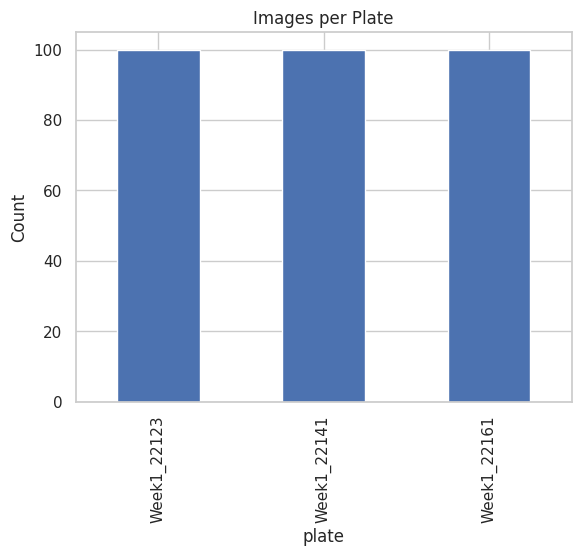

In [12]:
#Plate and well coverage
metadata_with_moa["plate"].value_counts().plot(kind="bar")
plt.title("Images per Plate")
plt.ylabel("Count")
plt.show()

In [13]:
#Missing MOa
missing = metadata_with_moa[metadata_with_moa["moa"].isna()]

print("Images without MOA:", len(missing))
missing["compound"].value_counts().head(10)

Images without MOA: 0


,count
compound,


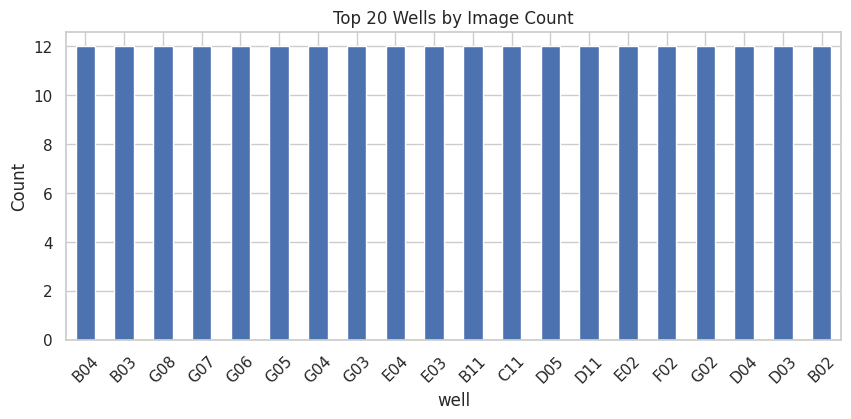

In [14]:
metadata_with_moa["well"].value_counts().head(20).plot(kind="bar", figsize=(10,4))
plt.title("Top 20 Wells by Image Count")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Step 1: Compound vs MOA mapping

In [ ]:
metadata[['CompoundName','MOA']].drop_duplicates().value_counts()

Step 2: Plates & batch effects

In [ ]:
metadata['Plate'].value_counts().plot(kind='bar') #UMAP later colored by plate (important for batch bias).

Step 3: Concentration vs MOA

In [ ]:
import seaborn as sns

sns.boxplot(data=metadata, x='MOA', y='Concentration')
plt.xticks(rotation=90)

Step 4: Replicate counts

In [ ]:
metadata.groupby(['CompoundName','Concentration']).size()

Step 5: Control vs treated

In [ ]:
metadata['is_control'] = metadata['CompoundName']=='DMSO'
metadata['is_control'].value_counts()